In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
#minmax scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Dados/data_tratado.csv', sep=";")  

In [3]:
df.loc[:,'DT_MEDICAO'] =  pd.to_datetime(df.loc[:,'DT_MEDICAO'], format='%Y-%m-%d')

In [4]:
df=df[['DT_MEDICAO','RAD','UMD_MAX','CHUVA']]

In [6]:
ts=df.groupby('DT_MEDICAO')['RAD','UMD_MAX','CHUVA'].sum()

<ipython-input-6-31535da9495a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ts=df.groupby('DT_MEDICAO')['RAD','UMD_MAX','CHUVA'].sum()


In [15]:
ts.reset_index()

,DT_MEDICAO,RAD,UMD_MAX,CHUVA
0,2015-01-01,28172.702,1324.0,0.0
1,2015-01-02,21412.210,1339.0,0.2
2,2015-01-03,13982.863,1818.0,1.4
3,2015-01-04,13622.406,1781.0,0.0
4,2015-01-05,14505.361,1892.0,12.6
...,...,...,...,...
2552,2021-12-27,21132.838,1544.0,3.2
2553,2021-12-28,18349.341,1797.0,1.6
2554,2021-12-29,26594.520,1784.0,0.0
2555,2021-12-30,11169.776,1901.0,4.0


In [16]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))

In [20]:
min_max_scaler.fit(ts[['RAD', 'CHUVA', 'UMD_MAX']])
min_max_scaler.transform(ts[['RAD', 'CHUVA', 'UMD_MAX']])

array([[0.80617419, 0.        , 0.39680426],
       [0.61271976, 0.0013986 , 0.40679095],
       [0.40012574, 0.00979021, 0.72569907],
       ...,
       [0.76101382, 0.        , 0.70306258],
       [0.31962803, 0.02797203, 0.78095872],
       [0.28659508, 0.22937063, 0.97403462]])

In [24]:
ts['day'] = ts.index.day
ts['dayofyear'] = ts.index.dayofyear
ts['weekday'] = ts.index.weekday
ts['weekofyear'] = ts.index.weekofyear

ts['month'] = ts.index.month
ts['is_month_start'] = ts.index.is_month_start
ts['is_month_end'] = ts.index.is_month_end

ts['year'] = ts.index.year
ts['is_year_start'] = ts.index.is_year_start
ts['ano_fim'] = ts.index.is_year_end

ts['quarter'] = ts.index.quarter
ts['quarter_comeco'] = ts.index.is_quarter_start
ts['quarter_fim'] = ts.index.is_quarter_end

ts['ts_lag1'] = ts.RAD.shift()

ts = ts.dropna()

<ipython-input-24-f4ec68945a6c>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  ts['weekofyear'] = ts.index.weekofyear


In [25]:
ts

,RAD,UMD_MAX,CHUVA,day,dayofyear,weekday,weekofyear,month,is_month_start,is_month_end,year,is_year_start,ano_fim,quarter,quarter_comeco,quarter_fim,ts_lag1
DT_MEDICAO,,,,,,,,,,,,,,,,,
2015-01-02,21412.210,1339.0,0.2,2,2,4,1,1,False,False,2015,False,False,1,False,False,28172.702
2015-01-03,13982.863,1818.0,1.4,3,3,5,1,1,False,False,2015,False,False,1,False,False,21412.210
2015-01-04,13622.406,1781.0,0.0,4,4,6,1,1,False,False,2015,False,False,1,False,False,13982.863
2015-01-05,14505.361,1892.0,12.6,5,5,0,2,1,False,False,2015,False,False,1,False,False,13622.406
2015-01-06,21899.710,1710.0,0.0,6,6,1,2,1,False,False,2015,False,False,1,False,False,14505.361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,21132.838,1544.0,3.2,27,361,0,52,12,False,False,2021,False,False,4,False,False,31915.829
2021-12-28,18349.341,1797.0,1.6,28,362,1,52,12,False,False,2021,False,False,4,False,False,21132.838
2021-12-29,26594.520,1784.0,0.0,29,363,2,52,12,False,False,2021,False,False,4,False,False,18349.341


In [26]:
X = ts.drop('RAD', axis=1)
y = ts['RAD']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

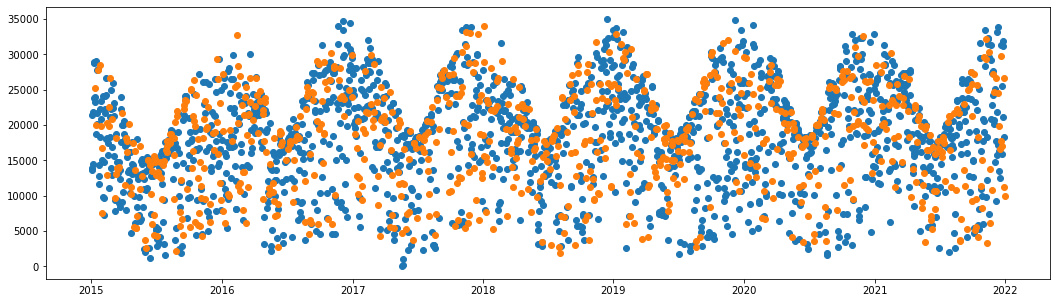

In [34]:
plt.figure(figsize=(18, 5))
plt.scatter(y_train.index, y_train)
plt.scatter(y_test.index, y_test);

In [37]:
# Fit regression model
dtr_regr = DecisionTreeRegressor(max_depth=5)
dtr_regr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [38]:
y_hat = dtr_regr.predict(X_test)

In [39]:
results = pd.DataFrame({'y_test': y_test, 'y_hat': y_hat})
results.sort_index(inplace=True)

In [40]:
results.head()

,y_test,y_hat
DT_MEDICAO,,
2015-01-10,25236.783,26069.733536
2015-01-15,20022.320,23506.867400
2015-01-20,27752.853,26069.733536
2015-01-25,28421.979,23461.404037
2015-01-27,19851.110,23506.867400


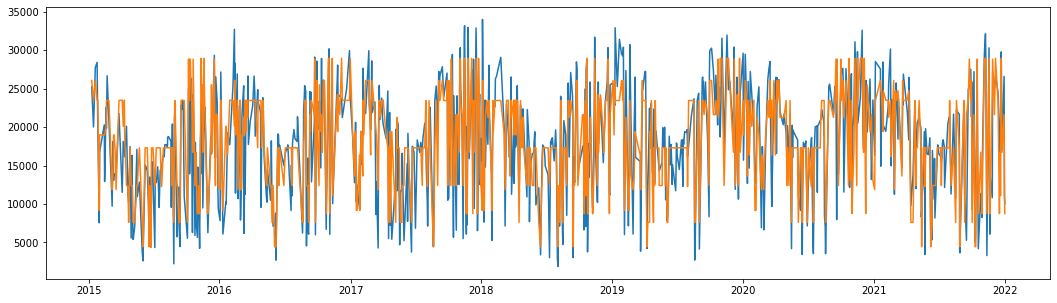

In [41]:
plt.figure(figsize=(18, 5))
plt.plot(results.index, results.y_test);
plt.plot(results.index, results.y_hat, c='C1');

In [42]:
y_hat = dtr_regr.predict(X_train)
results = pd.DataFrame({'y_train': y_train, 'y_hat': y_hat})
results.sort_index(inplace=True)
results.head()

,y_train,y_hat
DT_MEDICAO,,
2015-01-02,21412.210,26069.733536
2015-01-03,13982.863,18986.262787
2015-01-04,13622.406,20112.577231
2015-01-05,14505.361,18986.262787
2015-01-06,21899.710,23506.867400


In [47]:
dtr_regr.score(X_test, y_test)

0.6106771351292499

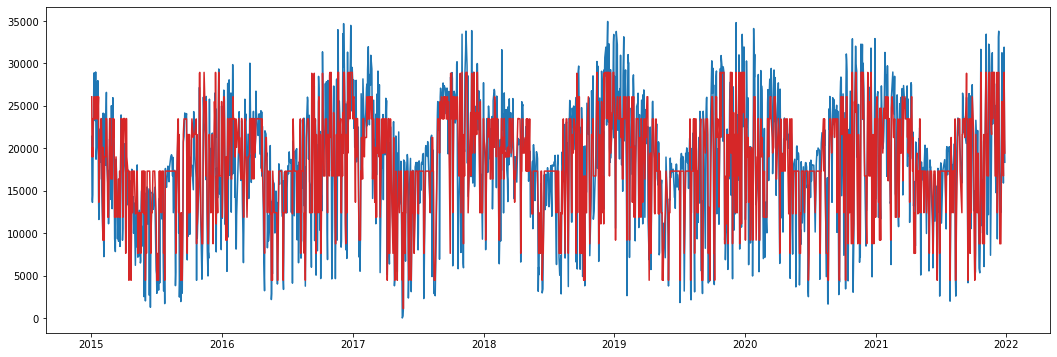

In [43]:
plt.figure(figsize=(18, 6))
plt.plot(results.index, results.y_train);
plt.plot(results.index, results.y_hat, c='C3');

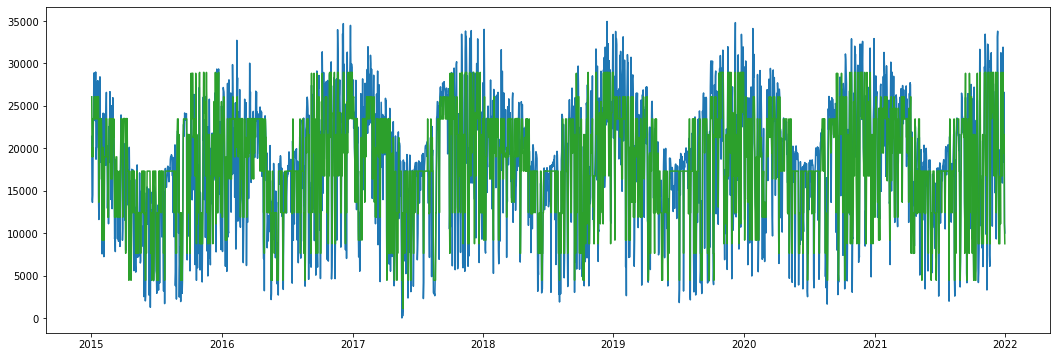

In [44]:
# Fit regression model
dtr_regr = DecisionTreeRegressor(max_depth=5)
dtr_regr.fit(X_train, y_train)

y_hat = dtr_regr.predict(X)
results = pd.DataFrame({'y_train': y, 'y_hat': y_hat})
results.sort_index(inplace=True)

plt.figure(figsize=(18, 6))
plt.plot(results.index, results.y_train);
plt.plot(results.index, results.y_hat, c='C2');